# Trabalho Final Data Mining

*Turma Bi Master 2019.3*

**Professora**: Manoela Kohler

**Aluno**: Rodrigo Moreira Araújo

**Matrícula**: 192.190.075

## Índice:

1. [Descrição do problema](#descricao)
2. [Análise Exploratória](#analise-exp)
    1. [Importação](#2-importacao)
    2. [Criação dos DataFrames](#2-criacao)
3. [Valores faltantes](#faltantes)
    1. [Categóricos](#3-categoricos)
    2. [Numéricos](#3-numericos)
    3. [Conversão de colunas categóricas](#3-conversao-categoricas)
    4. [Normalização dos dados](#3-normalizacao)
4. [Atributos desnecessários](#desnecessarios)
    1. [Univariate filter methods](#4-univariate)
    2. [Análise através de correlação](#4-correlacao)
5. [Balanceamento](#balanceamento)
6. [Classificação](#classificacao)
    1. [Árvore de decisão](#6-dt)
    2. [Random Tree Forest](#6-rtf)
    3. [Support Vector Classificator](#6-svc)
    4. [Rede neural artificial](#6-nn)
    5. [K Nearest Neighboors](#6-knn)
    6. [Logistic Regression](#6-lr)
    7. [Resultados parciais](#6-parciais)
    8. [Overfitting](#6-overfitting)
    9. [Resultados finais](#6-resultados)
7. [Conclusões](#conclusoes)
8. [Referências](#referencias)

## 1. Descrição do problema <a class="anchor" id="descricao"></a>

**Problema de classificação**

* 27 atributos numéricos e categóricos que descrevem o estado de saúde de cavalos; 
* Três classes de saída que indicam o que aconteceu com o cavalo: morreu, viveu ou se foi submetido à eutanásia. A ideia é prever se um cavalo pode sobreviver ou não baseado nas condições médicas passadas.

## 2. Análise exploratória dos dados <a class="anchor" id="analise-exp"></a>

#### A. Importação dos módulos necessários <a class="anchor" id="2-importacao"></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Para visualização com Seaborn
import seaborn as sns

# Para a seleção de atributos relevantes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# Para balanceamento do conjunto através do SMOTE
# Descomentar a linha abaixo para instalar a biblioteca imblearn
# !pip3 install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Para avaliação do desempenho dos classificadores
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Decision tree
from sklearn import tree

# Random Tree Forest
from sklearn.ensemble import RandomForestRegressor

# Support Vector Classification
from sklearn.svm import SVC

# Neural Network
from sklearn.neural_network import MLPClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Logistic regression
from sklearn.linear_model import LogisticRegression

#### B. Criação dos DataFrames de treino (df) e  teste (df_test) <a class="anchor" id="2-criacao"></a>

In [3]:
# Criação dos DataFrames de treino e teste

df_train = pd.read_csv("horse.csv")
df_test = pd.read_csv("horseTest.csv")

df_train.head(2)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no


In [4]:
df_train.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

## 3. Verificação de valores faltantes (*missing values*) <a class="anchor" id="faltantes"></a>

**Análise de dados faltantes para o DataFrame de treino**

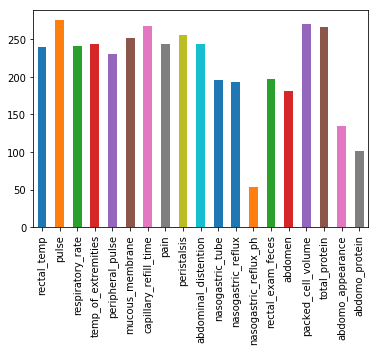

In [6]:
# Extrai o número total de linhas do Dataframe
total_lines = df_train.shape[0]

# Avalia o número de linhas preenchidas por coluna
cols_count = df_train.count(axis=0)

# Seleciona apenas as colunas com dados faltantes
missing_cols = cols_count[cols_count != total_lines]

# Verifica o tipo das colunas com dados faltantes
col_types = df_train[missing_cols.index].dtypes

# Segrega as colunas de float e de string
float_cols = col_types[col_types == "float64"]
str_cols = col_types[col_types == "object"]

# Lista de colunas faltantes com total de valores
missing_cols.plot(kind="bar")

Com base no gráfico acima, percebe-se que a coluna `nasogastric_reflux_ph` é a coluna que possui menos valores dentre as demais, com apenas 50 linhas preenchidas.

**Análise de dados faltantes para o DataFrame de teste**

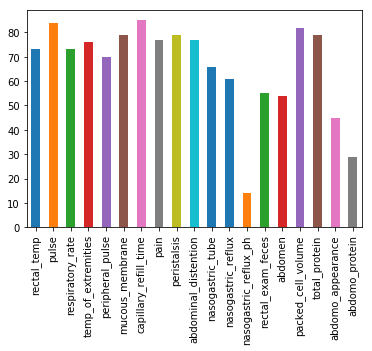

In [7]:
# Extrai o número total de linhas do Dataframe test
total_lines = df_test.shape[0]

# Avalia o número de linhas preenchidas por coluna
cols_count = df_test.count(axis=0)

# Seleciona apenas as colunas com dados faltantes
missing_cols_test = cols_count[cols_count != total_lines]

# Lista de colunas com total de valores
missing_cols_test.plot(kind="bar")

A mesma distribuição de atributos se repete no DataFrame de teste, com a coluna `nasogastric_reflux_ph` sendo aquela com menos valores preenchidos.

Como os conjuntos de treino e  teste foram segregados externamente, é necessário confirmar se ambosos DataFrames têm valores faltantes nas mesmas colunas.

In [8]:
# Avalia se as colunas com dados faltantes do DataFrame de teste 
# estão contidas no DataFrame de treino
contained = True
for x in missing_cols_test.index:
    contained = contained and (x in missing_cols.index)
if contained:
    print("As colunas com dados faltantes no DataFrame de testes são as mesmas do DataFrame de treino")
else:
    print("Há colunas diferentes com dados faltantes nos DataFrames de treino e de teste")

As colunas com dados faltantes no DataFrame de testes são as mesmas do DataFrame de treino


#### A. Preenchimento dos valores faltantes das colunas categóricas <a class="anchor" id="3-categoricos"></a>

In [9]:
# DataFrame de treino
# Extrai a moda de cada uma das colunas de string do DataFrame de treino com valores faltantes
train_col_modes = df_train[str_cols.index].mode()
df_train[train_col_modes.columns] = df_train[train_col_modes.columns].fillna(train_col_modes.iloc[0], axis=0)

# DataFrame de teste
# Extrai a moda de cada uma das colunas de string do DataFrame de teste com valores faltantes
test_col_modes = df_test[str_cols.index].mode()
df_test[test_col_modes.columns] = df_test[test_col_modes.columns].fillna(test_col_modes.iloc[0], axis=0)

# Os trechos de código abaixo confirmam que todas as colunas com dados
# categóricos faltantes foram preenchidas em ambos os DataFrames
if np.all(df_train[train_col_modes.columns].count() == 299):
    print("Colunas categóricas do DataFrame de treino totalmente preenchidas")
else:
    print("Ainda há colunas categóricas faltantes no DataFrame de treino")

if np.all(df_test[test_col_modes.columns].count() == 89):
    print("Colunas categóricas do DataFrame de teste totalmente preenchidas")
else:
    print("Ainda há colunas categóricas faltantes no DataFrame de teste")

Colunas categóricas do DataFrame de treino totalmente preenchidas
Colunas categóricas do DataFrame de teste totalmente preenchidas


#### B. Preenchimento dos valores faltantes das colunas numéricas  <a class="anchor" id="3-numericos"></a>

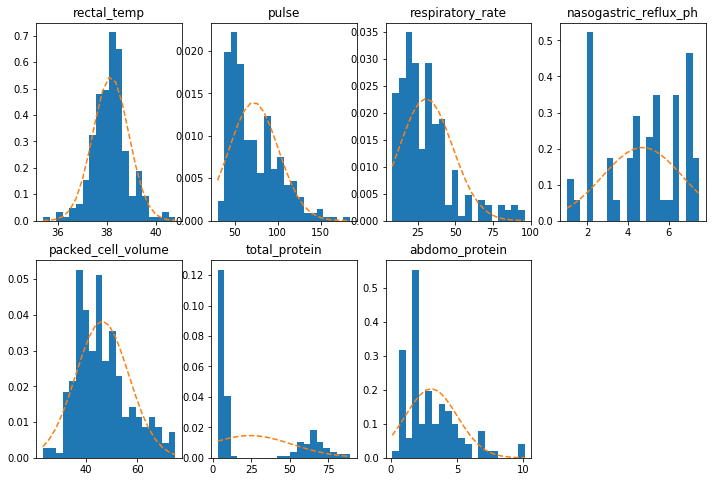

In [10]:
# Análise das distribuições dos valores faltantes do tipo float
def plot_histograms(dataframe, cols):
    fig = plt.figure(figsize=(12,8))
    for i, col in enumerate(cols.index):
        plt.subplot(2, 4, i+1)
        plt.title(col)
        vals = np.array(dataframe[col].copy().dropna().values)
        # Plota o histograma
        nhist, bins, patches = plt.hist(vals, bins=20, density=True)
        # Cálculo dos parâmetros da distribuição normal
        mean = vals.mean() 
        std = vals.std()  
        y = ((1/(np.sqrt(2*np.pi)*std))*np.exp(-0.5*(1/std*(bins-mean))**2))
        # Plota a gaussiana que melhor ajusta o histograma
        plt.plot(bins, y, '--')

plot_histograms(df_train, float_cols)

A análise dos histogramas permite concluir que as colunas `rectal_temp`, `packed_cell_volume`, `pulse` e `respiratory_rate` se aproximam razoavelmente de distribuições normais. Assim, os valores faltantes podem ser preenchidos com a mediana.

Para as outras três colunas (`nasograstric_reflux_ph`, `total_protein`, `abdomo_protein`), será usada a moda.

In [11]:
normal_float_cols = ["rectal_temp","packed_cell_volume","pulse","respiratory_rate"]
other_float_cols = ["nasogastric_reflux_ph", "total_protein", "abdomo_protein"]
for col in normal_float_cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())
for col in other_float_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

# Os trechos de código abaixo confirmam que todas as colunas com dados
# numéricos faltantes foram preenchidas em ambos os DataFrames
if np.all(df_train[float_cols.index].count() == 299):
    print("Colunas numéricas do DataFrame de treino totalmente preenchidas")
else:
    print("Ainda há colunas numéricas faltantes no DataFrame de treino")

if np.all(df_test[float_cols.index].count() == 89):
    print("Colunas numéricas do DataFrame de treino totalmente preenchidas")
else:
    print("Ainda há colunas numéricas faltantes no DataFrame de treino")

Colunas numéricas do DataFrame de treino totalmente preenchidas
Colunas numéricas do DataFrame de treino totalmente preenchidas


#### C. Tratamento de colunas categóricas <a class="anchor" id="3-conversao-categoricas"></a>

Uma vez preenchidos os valores faltantes, é necessário tratá-los e convertê-los para colunas numéricas

In [12]:
# Extração das colunas que possuem dados categóricos
categorical_cols = df_train.select_dtypes(include=['object']).columns

As colunas `surgery`, `surgical_lesion`, `cp_data`, `age`, `capillary_refill_time`, `temp_of_extremities`, `peripheral_pulse`, `capillary_refill_time`, `pain`, `peristalsis`, `abdominal_distention`, `nasogastric_tube`, `nasogastric_reflux`, `rectal_exam_feces`, `mucous_membrane`, `abdomen`, `abdomo_appearance` possuem valores categóricos.

Porém, a sua conversão pode ser feita para valores numéricos de forma diferente:
* **Colunas `surgery`, `surgical_lesion`, `cp_data`**: contém apenas `yes` e `no`, então podem ser diretamente convertidas para 0 e 1;
* **Colunas `age`, `capillary_refill_time`, `temp_of_extremities`, `peripheral_pulse`, `capillary_refill_time`, `pain`, `peristalsis`, `abdominal_distention`, `nasogastric_tube`, `nasogastric_reflux`, `rectal_exam_feces`, `mucous_membrane`, `abdomen`, `abdomo_appearance`**: contém categorias e serão convertidas com *One Hot Encoding*

In [13]:
for curr_df in [df_train, df_test]:
    yes_no_cols = ["surgery", "surgical_lesion", "cp_data"]
    curr_df[yes_no_cols] = curr_df[yes_no_cols].replace({"yes":1,"no":0})
    curr_df["age"] = curr_df["age"].replace({"young":0, "adult":1})
    curr_df["capillary_refill_time"] = curr_df["capillary_refill_time"].replace({1:0, 2:1})

    # Como o objetivo é avaliar se o cavalo sobreviveu, os valores died e euthanized serão tratados indistintamente
    curr_df["outcome"] = curr_df["outcome"].replace({"died":0, "euthanized":0, "lived":1})

In [14]:
# Criando One Hot Encoding das variáveis categóricas restantes: mucous_membrane, abdomen, abdomo_appearance
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [15]:
# Garantindo a consistência das colunas criadas com One Hot Encoding entre os DataFrames de treino e teste

train_cols = df_train.columns
test_cols = df_test.columns

if np.all(train_cols == test_cols):
    print("As colunas do One Hot Encoding foram criadas para ambos os DataFrames")
else:
    print("Há colunas faltando em algum dos DataFrames")

As colunas do One Hot Encoding foram criadas para ambos os DataFrames


#### D. Normalização dos dados  <a class="anchor" id="3-normalizacao"></a>

In [16]:
df_train=(df_train-df_train.min())/(df_train.max()-df_train.min())
df_test=(df_test-df_test.min())/(df_test.max()-df_test.min())

## 4. Atributos desnecessários  <a class="anchor" id="desnecessarios"></a>

A seleção de atributos com maior impacto na saída será feita com base na função [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) do Scikit Learn e na avaliação da correlação entre cada um dos atributos e a variável de saída `outcome`

Para o primeiro caso, serão construídas 4 listas de 10 atributos: 1 para cada uma das funções de rankeamento (chi2, f_classif e mutual_info_classif) disponíveis no Scikit Learn e uma considerando um rankeamento conjunto com base nas três funções.

#### A. Univariate filter methods <a class="anchor" id="4-univariate"></a>

In [17]:
# Definição da semente para garantia de repetibilidade
np.random.seed(100)

# Extrai a lista de todas as colunas do DataFrame
all_cols = list(df_train.columns.values)

# Remove a coluna de resultado e constrói novos DataFrame X_train e X_test apenas
# com as colunas de entrada dos respectivos DataFrames
all_cols.remove("outcome")
x_cols = all_cols
X_train = df_train[x_cols]
X_test = df_test[x_cols]

# Constrói novas Series y_train e y_test com as respectivas colunas de saída
y_train = df_train["outcome"].values
y_test = df_test["outcome"].values

In [18]:
# Número de atributos a extrair
sel_attrs = 30

# Utiliza a função SelectKBest do ScikitLearn e constrói um dicionário com o ranking
# de atributos para cada score function: chi2, f_classif e mutual_info_classif
best_feats = {}
all_funcs = {"chi2":chi2, "f_classif":f_classif, "mutual_info_classif": mutual_info_classif}
for func_name in all_funcs:
    best_features = SelectKBest(score_func=all_funcs[func_name], k=sel_attrs)
    fit = best_features.fit(X_train, y_train)
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(X_train.columns)
    df_features = pd.concat([df_columns,df_scores], axis=1)
    df_features.columns = ["Specs", f"Score {func_name}"]
    df_features = df_features.sort_values(f"Score {func_name}", ascending=False)
    df_features = df_features.reset_index()
    best_feats[func_name] = df_features

In [19]:
# Constrói um novo ranking misto levando em consideração as posições dos
# atributos nos 3 ranking gerados anteriormente
n_attrs = df_train.shape[1]-1
vals = []
for attr in all_cols:
    vals.append(0)
    for func in best_feats:
        curr_df = best_feats[func]
        vals[-1] += n_attrs - curr_df[curr_df["Specs"] == attr].index[0]
attr_df = pd.DataFrame({"Columns":all_cols, "New ranking":vals}).sort_values("New ranking", ascending=False)
# attr_df

In [20]:
# Constrói um DataFrame para comparação dos rankings dos atributos em cada
# uma das funções e com sua posição no ranking combinado

for func in all_funcs:
    curr_df = best_feats[func]
    classif_pos = []
    for attr in attr_df["Columns"]:
        classif_pos.append(curr_df[curr_df["Specs"] == attr].index[0])
    attr_df[func + " pos"] = classif_pos

attr_df = attr_df.sort_values("New ranking", ascending=False)
# attr_df

In [21]:
# Constrói um dicionário com os rankeamentos dos atributos
relevant_attrs = {
    "all_attrs": all_cols,
    "combined": [attr for attr in attr_df["Columns"].iloc[:sel_attrs]],
    "chi2": [attr for attr in best_feats["chi2"]["Specs"].iloc[:sel_attrs]],
    "f_classif": [attr for attr in best_feats["f_classif"]["Specs"].iloc[:sel_attrs]],
    "mutual_info_classif": [attr for attr in best_feats["mutual_info_classif"]["Specs"].iloc[:sel_attrs]]
}
# relevant_attrs

A construção do ranking combinado, porém, selecionou praticamente as mesmas colunas previamente selecionadas pela função `f_classif`, conforme pode ser confirmado abaixo. 

Assim, considerou-se desnecessária a análise com o ranking combinado e esse será removido das análises posteriores.

In [22]:
# O for abaixo serve apenas para demonstrar a similaridade entre os atributos
# selecionados com a função f_classif e com o ranking combinado
# for attr in relevant_attrs["f_classif"]:
#    print(attr, attr in relevant_attrs["combined"])

del relevant_attrs["combined"]
# relevant_attrs

#### B. Análise através de correlação <a class="anchor" id="4-correlacao"></a>

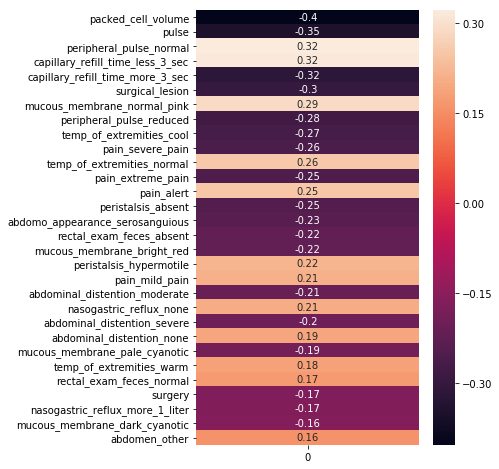

In [23]:
# Calcula a correlação entre todas as colunas e a coluna de resultado outcome
corr = df_train.corrwith(df_train["outcome"])

# Remove a coluna outcome para melhor visualização
corr.drop("outcome", inplace=True)

# Ordena os atributos pelo valor absoluto da correlação e 
# extrai apenas os 10 mais importantes
corr_df = pd.concat([corr, np.abs(corr)], axis=1)
corr_df.columns = ["Original values", "Absolute values"]
corr_df = corr_df.sort_values("Absolute values", ascending=False)
n_best = corr_df.iloc[:sel_attrs]
n_best = n_best["Original values"]

# Modifica o tamanho default da imagem para melhor visualização do heatmap
plt.figure(figsize = (5,8))

# Constrói um heatmap para visualização.
# A conversão do valores da coluna em numpy array é necessária para 
# visualização na vertical através da transposição 
n_best_vals = np.array([n_best.values]).T
sns.heatmap(n_best_vals, yticklabels=n_best.index, annot=True)

É interessante notar que o resultado da seleção através de correlação é idêntico aos valores obtidos com a função de rankeamento `f_classif` conforme pode ser verificado na célula abaixo.

Dessa forma, os valores obtidos com a correlação não serão incluídos na lista de atributos.

In [24]:
# Compara as listas de atributos relevantes gerada pela função f_classif
# com aqueles obtidos através da análise de correlação entre os atributos
# e a variável de saída

# for a, b in zip(relevant_attrs["f_classif"],n_best.index.values):
#     print(a == b)


## 5. Balanceamento <a class="anchor" id="balanceamento"></a>

Conforme pode ser visto abaixo, existe um desbalanceio entre as classes 1 (cavalo sobreviveu) e 0 (morte ou eutanásia).

In [25]:
df_train["outcome"].value_counts()

1.0    178
0.0    121
Name: outcome, dtype: int64

Há diversas alternativas para a solução do problema de balanceamento como **undersampling** e **oversampling** que consistem, respectivamente, em reduzir e aumentar os conjuntos de opções através da remoção ou adição aleatória de elementos pré-existentes.

Esse relatório, porém, utilizará o método **SMOTE** (Synthetic Minority Oversampling TEchnique) que consiste em sintetizar elementos da classe minoritária com base nos elementos que já existem.

<img src="smote.png"/>

In [26]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train.values, y_train)
df_sm = pd.DataFrame(X_sm)
df_y = pd.DataFrame(y_sm)
df_sm = pd.concat([df_sm, df_y], axis=1)
df_sm.columns = all_cols + ["outcome"]

Visualização dos dados pré e pós SMOTE considerando todos os atributos relevantes

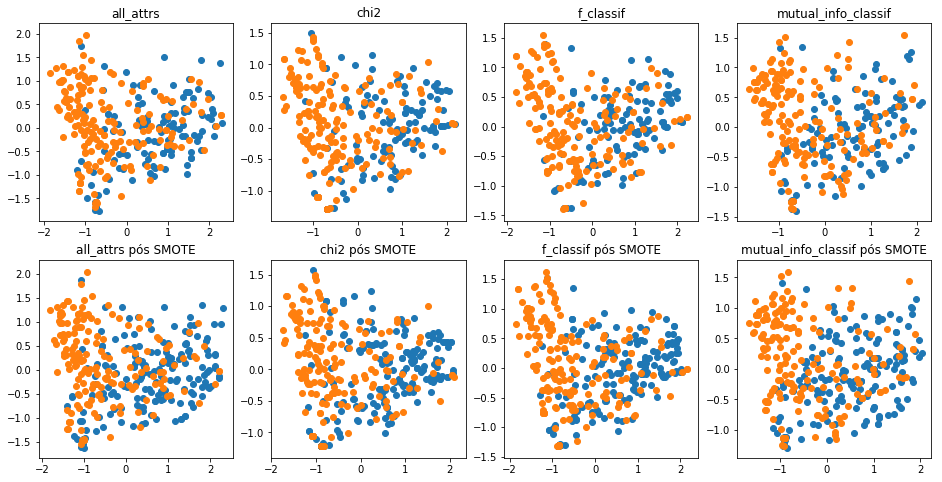

In [27]:
# Função para plotar os dados em um espaço bidimensional
pca = PCA(n_components=2)
plt.figure(figsize = (16,8))

for i,func in enumerate(relevant_attrs):
    plt.subplot(2, 4, i+1)
    X_2d = pca.fit_transform(X_train[relevant_attrs[func]])
    plt.scatter(X_2d[y_train==0,0], X_2d[y_train==0,1])
    plt.scatter(X_2d[y_train==1,0], X_2d[y_train==1,1])
    plt.title(func)
    
    plt.subplot(2, 4, i+5)
    X_2d = pca.fit_transform(df_sm[relevant_attrs[func]])
    plt.scatter(X_2d[y_sm==0,0], X_2d[y_sm==0,1])
    plt.scatter(X_2d[y_sm==1,0], X_2d[y_sm==1,1])
    plt.title(func + " pós SMOTE")


In [28]:
df_sm["outcome"].value_counts()

1.0    178
0.0    178
Name: outcome, dtype: int64

## 6. Classificação <a class="anchor" id="classificacao"></a>

In [29]:
df_sm = X_train
y_sm = y_train

In [30]:
# Dicionário para armazenar todos os valores de acurácia 
all_results = {
    "Decision tree": [],
    "Random tree forest": [],
    "SVC": [],
    "Neural network": [],
    "KNN": [],
    "Logistic regression": []
}

attribute_sets = ["all_attrs", "chi2", "f_classif", "mutual_info_classif"]

### A. Árvore de decisão <a class="anchor" id="6-dt"></a>

In [31]:
all_preds = {}
for func in attribute_sets:
    clf = tree.DecisionTreeClassifier(random_state=100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    all_preds[func] = y_pred
    accuracy = accuracy_score(y_test, all_preds[func])
    print(f"# {func}")
    print("Accuracy: ", accuracy)
    print()
    all_results["Decision tree"].append(accuracy)

# all_attrs
Accuracy:  0.6179775280898876

# chi2
Accuracy:  0.7752808988764045

# f_classif
Accuracy:  0.797752808988764

# mutual_info_classif
Accuracy:  0.5955056179775281



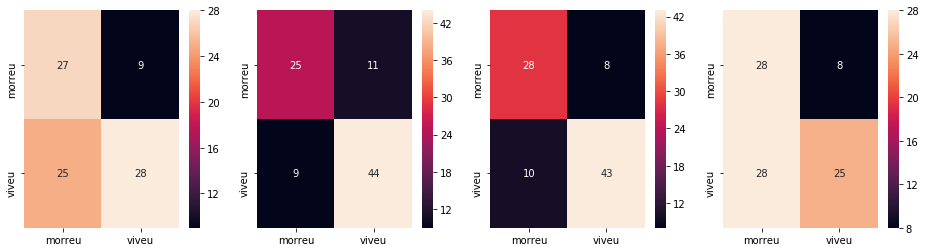

In [32]:
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, all_preds[func]), 
            annot=True,
            xticklabels=["morreu", "viveu"],
            yticklabels=["morreu", "viveu"])

### B. Random Tree Forest <a class="anchor" id="6-rtf"></a>

# all_attrs
Accuracy:  0.9662921348314607

# chi2
Accuracy:  0.9213483146067416

# f_classif
Accuracy:  0.9325842696629213

# mutual_info_classif
Accuracy:  0.9438202247191011



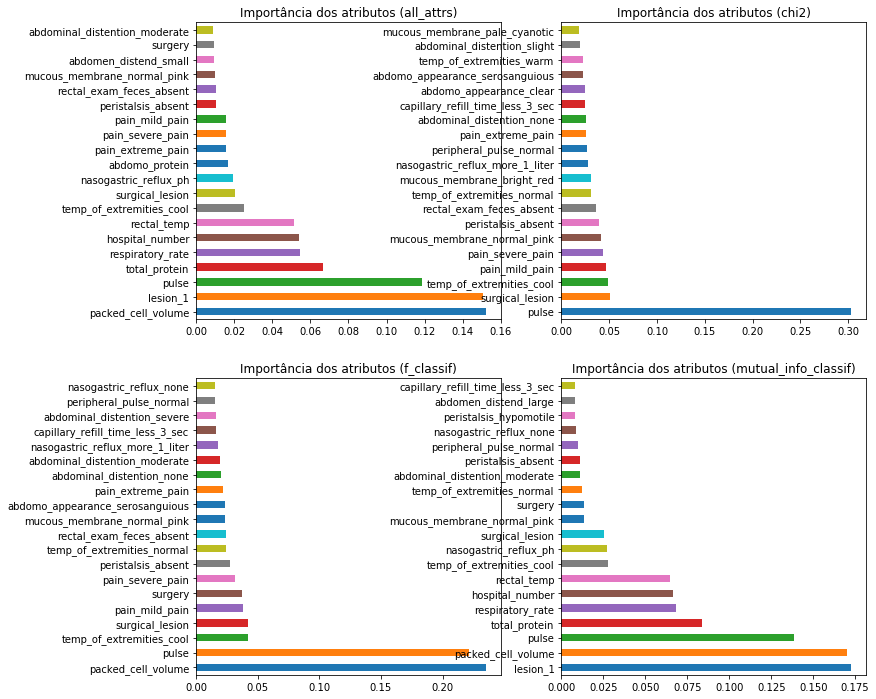

In [33]:
all_preds = {}
fig = plt.figure(figsize=(12,12))
for i,func in enumerate(attribute_sets):
    clf = RandomForestRegressor(n_estimators = 100, random_state = 100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1
    all_preds[func] = y_pred
    accuracy = accuracy_score(y_test, all_preds[func])
    print(f"# {func}")
    print("Accuracy: ", accuracy)
    print()
    all_results["Random tree forest"].append(accuracy)
    plt.subplot(2,2,i+1)
    importances = clf.feature_importances_
    feat_importances = pd.Series(clf.feature_importances_, index=df_sm[relevant_attrs[func]].columns).sort_values(ascending=False)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.title(f"Importância dos atributos ({func})")

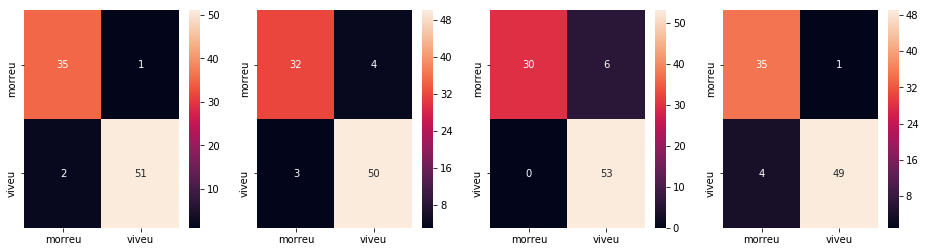

In [34]:
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, all_preds[func]), 
            annot=True,
            xticklabels=["morreu", "viveu"],
            yticklabels=["morreu", "viveu"])

### C. Support Vector Classificator <a class="anchor" id="6-svc"></a>

In [35]:
all_preds = {}
for i,func in enumerate(attribute_sets):
    clf = SVC(kernel="rbf", C=1000, gamma=0.1, random_state=100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    all_preds[func] = y_pred
    accuracy = accuracy_score(y_test, all_preds[func])
    print(f"# {func}")
    print("Accuracy: ", accuracy)
    print()
    all_results["SVC"].append(accuracy)

# all_attrs
Accuracy:  0.9662921348314607

# chi2
Accuracy:  0.9550561797752809

# f_classif
Accuracy:  1.0

# mutual_info_classif
Accuracy:  0.8202247191011236



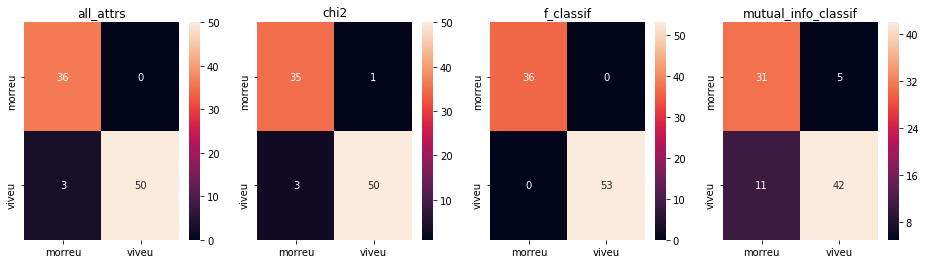

In [36]:
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    plt.subplot(1,4,i+1)
    plt.title(func)
    sns.heatmap(confusion_matrix(y_test, all_preds[func]), 
            annot=True,
            xticklabels=["morreu", "viveu"],
            yticklabels=["morreu", "viveu"])

### D. Rede neural artificial <a class="anchor" id="6-nn"></a>

In [37]:
all_preds = {}
for func in relevant_attrs:
    clf = MLPClassifier(
        hidden_layer_sizes=(10,10,10),
        random_state=100, 
        max_iter=3000
    )
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    all_preds[func] = y_pred
    accuracy = accuracy_score(y_test, all_preds[func])
    print(f"# {func}")
    print("Accuracy: ", accuracy)
    print()
    all_results["Neural network"].append(accuracy)

# all_attrs
Accuracy:  0.9325842696629213

# chi2
Accuracy:  0.9550561797752809

# f_classif
Accuracy:  0.9775280898876404

# mutual_info_classif
Accuracy:  0.7640449438202247



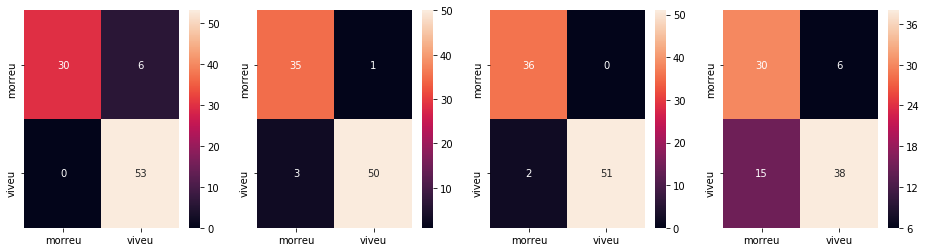

In [38]:
plt.figure(figsize=(16,4))
for i,func in enumerate(relevant_attrs):
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, all_preds[func]), 
            annot=True,
            xticklabels=["morreu", "viveu"],
            yticklabels=["morreu", "viveu"])

### E. KNN <a class="anchor" id="6-knn"></a>

In [39]:
all_preds = {}
for func in relevant_attrs:
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    all_preds[func] = y_pred
    accuracy = accuracy_score(y_test, all_preds[func])
    print(f"# {func}")
    print("Accuracy: ", accuracy)
    print()
    all_results["KNN"].append(accuracy)

# all_attrs
Accuracy:  0.8426966292134831

# chi2
Accuracy:  0.8651685393258427

# f_classif
Accuracy:  0.8539325842696629

# mutual_info_classif
Accuracy:  0.8314606741573034



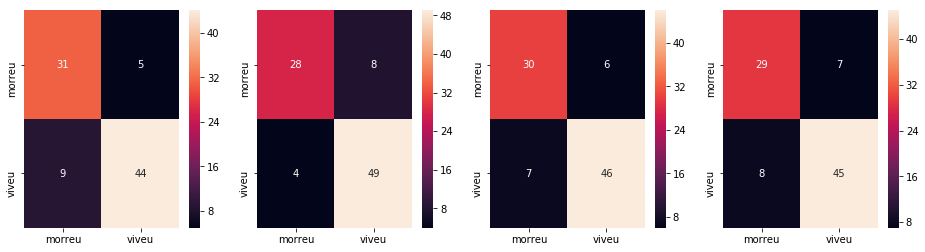

In [40]:
plt.figure(figsize=(16,4))
for i,func in enumerate(relevant_attrs):
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, all_preds[func]), 
            annot=True,
            xticklabels=["morreu", "viveu"],
            yticklabels=["morreu", "viveu"])

### F. Logistic regression <a class="anchor" id="6-lr"></a>

In [41]:
all_preds = {}
for func in relevant_attrs:
    clf = LogisticRegression(random_state=100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    all_preds[func] = y_pred
    accuracy = accuracy_score(y_test, all_preds[func])
    print(f"# {func}")
    print("Accuracy: ", accuracy)
    print()
    all_results["Logistic regression"].append(accuracy)

# all_attrs
Accuracy:  0.8314606741573034

# chi2
Accuracy:  0.8089887640449438

# f_classif
Accuracy:  0.7752808988764045

# mutual_info_classif
Accuracy:  0.7865168539325843



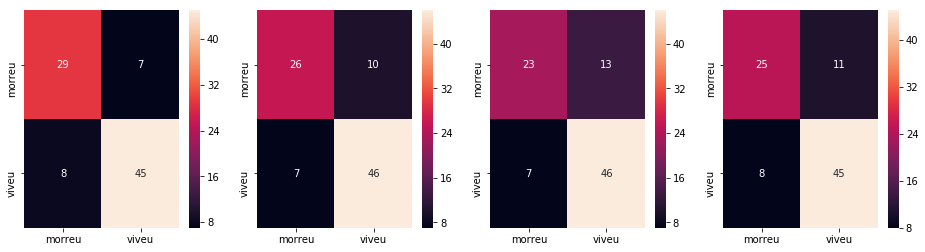

In [42]:
plt.figure(figsize=(16,4))
for i,func in enumerate(relevant_attrs):
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, all_preds[func]), 
            annot=True,
            xticklabels=["morreu", "viveu"],
            yticklabels=["morreu", "viveu"])

### G. Resultados parciais <a class="anchor" id="6-parciais"></a>

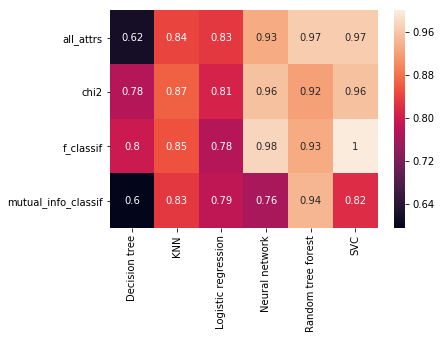

In [43]:
df_results = pd.DataFrame(all_results, index=attribute_sets)
sns.heatmap(df_results, annot=True)

### H. Remoção de overfitting <a class="anchor" id="6-overfitting"></a>

Os resultados obtidos, apesar de bons, podem ser melhorados.

A análise do impacto dos atributos no classificador Random Tree Forest mostra que alguns atributos estão impactando massivamente na análise. `pulse` impacta todas as funções, `packed_cell_volume` impacta todas menos `chi2` e `lesion_1` impacta os conjuntos todos os atributos e mutual_info_classif.

Esse impacto exagerado pode ser um sinal de overfitting dos dados. Assim, a análise foi reconstruída a partir da remoção desses atributos de seus respectivos conjuntos e da construção de um novo dataframe de resultados.

In [44]:
new_results = {
    "Decision tree": [],
    "Random tree forest": [],
    "SVC": [],
    "Neural network": [],
    "KNN": [],
    "Logistic regression": []
}

attribute_sets = ["all_attrs", "chi2", "f_classif", "mutual_info_classif"]

for func in ["all_attrs", "chi2", "f_classif", "mutual_info_classif"]:
    relevant_attrs[func].remove("pulse")
    if func != "chi2":
        relevant_attrs[func].remove("packed_cell_volume")
    if func not in ("chi2", "f_classif"):
        relevant_attrs[func].remove("lesion_1")

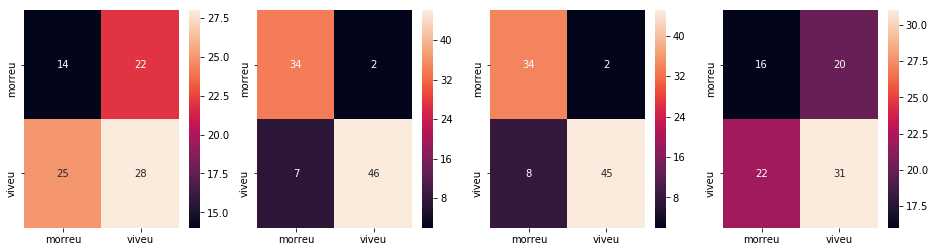

In [45]:
# Arvores de decisao
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    clf = tree.DecisionTreeClassifier(random_state=100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    accuracy = accuracy_score(y_test, y_pred)
    new_results["Decision tree"].append(accuracy)
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                xticklabels=["morreu", "viveu"],
                yticklabels=["morreu", "viveu"])

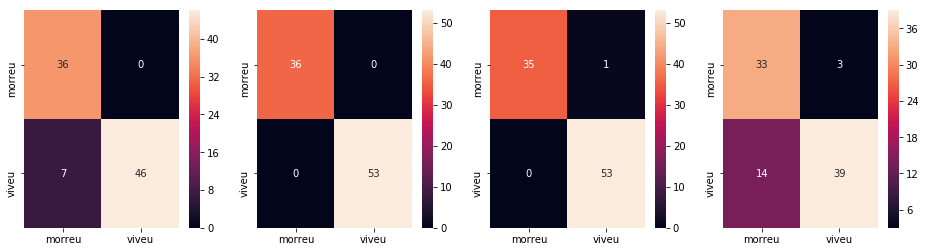

In [46]:
# Random tree forests
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    clf = RandomForestRegressor(n_estimators = 100, random_state = 100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1
    accuracy = accuracy_score(y_test, y_pred)
    new_results["Random tree forest"].append(accuracy)
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                xticklabels=["morreu", "viveu"],
                yticklabels=["morreu", "viveu"])

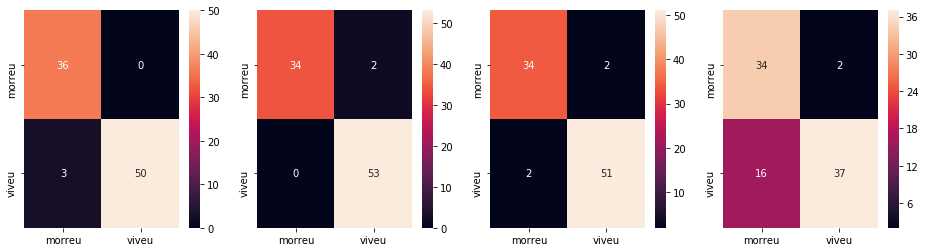

In [47]:
# SVC
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    clf = SVC(kernel="rbf", C=1000, gamma=0.1, random_state=100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    accuracy = accuracy_score(y_test, y_pred)
    new_results["SVC"].append(accuracy)
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                xticklabels=["morreu", "viveu"],
                yticklabels=["morreu", "viveu"])

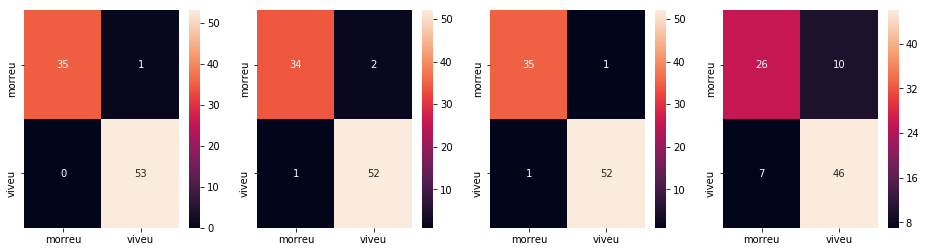

In [48]:
# RNA 
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    clf = MLPClassifier(
        hidden_layer_sizes=(30),
        random_state=100, 
        max_iter=3000
    )
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    accuracy = accuracy_score(y_test, y_pred)
    new_results["Neural network"].append(accuracy)
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                xticklabels=["morreu", "viveu"],
                yticklabels=["morreu", "viveu"])

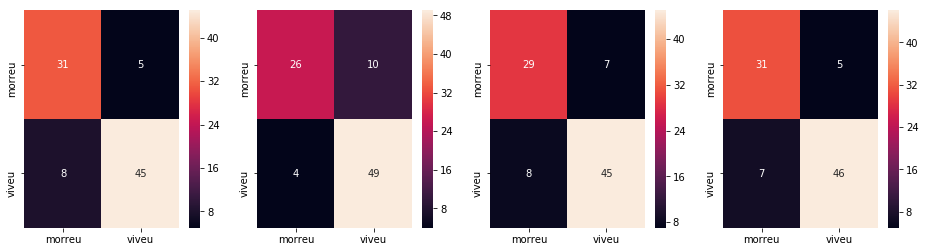

In [49]:
# KNN
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    accuracy = accuracy_score(y_test, y_pred)
    new_results["KNN"].append(accuracy)
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                xticklabels=["morreu", "viveu"],
                yticklabels=["morreu", "viveu"])

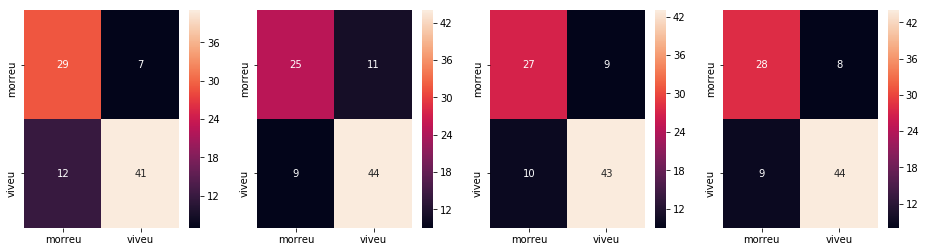

In [50]:
# Logistic regression
plt.figure(figsize=(16,4))
for i,func in enumerate(attribute_sets):
    clf = LogisticRegression(random_state=100)
    clf.fit(df_sm[relevant_attrs[func]], y_sm)
    y_pred = clf.predict(df_test[relevant_attrs[func]])
    accuracy = accuracy_score(y_test, y_pred)
    new_results["Logistic regression"].append(accuracy)
    plt.subplot(1,4,i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                xticklabels=["morreu", "viveu"],
                yticklabels=["morreu", "viveu"])

### I. Resultados finais <a class="anchor" id="6-resultados"></a>

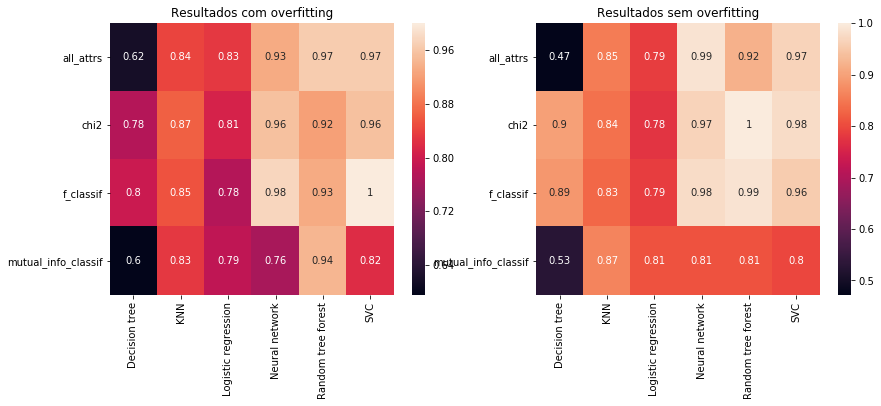

In [51]:
df_new_results = pd.DataFrame(new_results, index=attribute_sets)

fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Resultados com overfitting")
sns.heatmap(df_results, annot=True)

plt.subplot(1,2,2)
plt.title("Resultados sem overfitting")
sns.heatmap(df_new_results, annot=True)

## 7. Conclusões <a class="anchor" id="conclusoes"></a>

A comparação entre os resultados obtidos com o uso de todos os atributos e com apenas aqueles selecionados pelas funções de rankeamento mostram um impacto variado nos diversos algoritmos: 
* As árvores de decisão melhoraram com a remoção das colunas citadas com as funções de rankeamento `chi2` e `f_classif`;
* KNN e regressão lgística não apresentaram ganhos;
* Houve uma melhora na acurácia das redes neurais artificiais, especialmente usando todos os atributos e usando os atributos selecionados pela função `mutual_info_classif`
* No Random tree forest, houve ganho expressivo nos conjuntos de atributo `chi2` e `f_classif` atingindo resultados de 100% e 99% de acerto;
* O SVC não apresentou ganhos.

Percebe-se assim, a importância da análise do pareamento entre os diversos algoritmos de classificação e as diversas funções de rankeamento dos atributos. Outro ponto importante é que o uso das funções de rankeamento diretamente produz ganhos expressivos, mas esse pode ser melhorado com uma verificação individual dos impactos de cada atributo do conjunto de dados. Neste exemplo, foi possível melhorar os resultados obtidos com as redes neurais e Random Tree Forest através da remoção de alguns atributos.

Além disso, ao longo da construção da solução, foi possível compreender a importância da conversão dos atributos categóricos em colunas específicas com o algoritmo One Hot Encoding e também a importância de selecionar a quantidade correta de atributos. Antes de chegar no valor de 30 atributos, o código foi testado com resultados consideravelmente piores para 10, 20, 35 e 40 atributos.

Por fim, não se pode menosprezar a importância das estratégias utilizadas no início do problema para preenchimento das células vazias do DataFrame e também do balanceamento do mesmo através da estratégia SMOTE.

## 8. Referências <a class="anchor" id="referencias"></a>

Categorical encoding
* https://pbpython.com/categorical-encoding.html

Feature selection: 
* https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
* https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
* https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

Smote:
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets